<a href="https://colab.research.google.com/github/GDi4K/imitools/blob/main/docs/tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imitools Demo

This colab shows you how to Imitools as way to improve the image handling when working with a notebook & using a Pytorch model.

In [1]:
# installation
!rm -rf imitools && git clone https://github.com/GDi4K/imitools.git

Cloning into 'imitools'...
remote: Enumerating objects: 72, done.
remote: Counting objects: 100% (72/72), done.
remote: Compressing objects: 100% (55/55), done.
remote: Total 72 (delta 40), reused 27 (delta 12), pack-reused 0
Unpacking objects: 100% (72/72), done.


In [2]:
# import it
import imitools as I

In [3]:
# import torch & others which we will use in this notebook
import torch
import math
import time

## Hello World Images

Let's download some cat images and render them here.

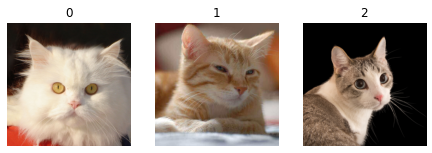

In [4]:
image_urls = [
    "https://images2.fanpop.com/image/photos/13400000/Cat-cats-13494223-2304-1728.jpg",
    "https://news.wisc.edu/content/uploads/2016/03/cat-959275_960_720.jpg",
    "https://i.natgeofe.com/n/548467d8-c5f1-4551-9f58-6817a8d2c45e/NationalGeographic_2572187_square.jpg"
]
images = I.download(image_urls).crop(256).show()

Yep, that's the hello world of imitools. We will talk more about downloading images later.

##Core Concepts of Imitools

- Bring in images from all sources into a single place like PyTorch images, PIL images, Disk, or Internet
- Apply various transformations like crop, resize, normalization, etc
- Then output them as you like including displaying, PyTorch tensors, inline video, and to disk.
- Imagine all those things without some boilerplate free code and one-liners like below:

```python
I.download(some_image_urls).crop(224).show()
I.download(some_image_urls).to_dir("/path/to/images")
pytorch_images = I.from_dir("path/to/images").resize(256).pt()
images = I.wrap(pytorch_images ).crop(224)
images.show()
pil_images = images.pick(0, 3, 4).normalize().pil()
I.merge(images, pil_images, pytorch_images, pil_images[0]).resize(128).to_dir("thumbs")
```

## Let's Create Some Fake Images

In order to demonstrate most of functionalities of imitools, let's create some random images using pytorch.

In [5]:
# let's create some images
pt_images = torch.rand(10, 3, 8, 8)

## Viewing those images

Now let's try to view those images. For that, we are going to **wrap** those images with imitools.

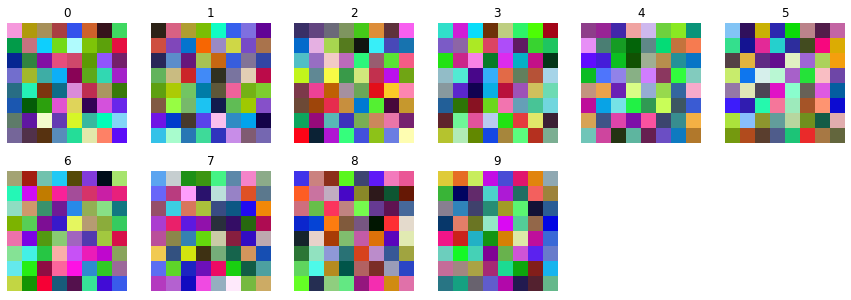

In [6]:
# to view these images
I.wrap(pt_images).show()

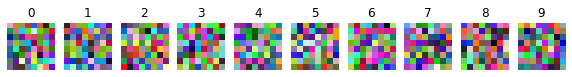

In [7]:
# you can change the columns and the scale of those as well.
I.wrap(pt_images).show(cols=10, scale=1)

## Imitools Image Wrapping & Convertion

Usually we mainly use two types of images.

* Pytorch images (basically a tensor)
* PIL images (native [python images](https://pillow.readthedocs.io/en/stable/), which has some nice functionality)

Libraries & models use both sometimes and we need to covert them. That's a bit of pain and add some boilerplate code.

**That's where imitools can help you**

You can use any such image or multiple of them with imitools & it knows how to handle them.

Let's have a look.

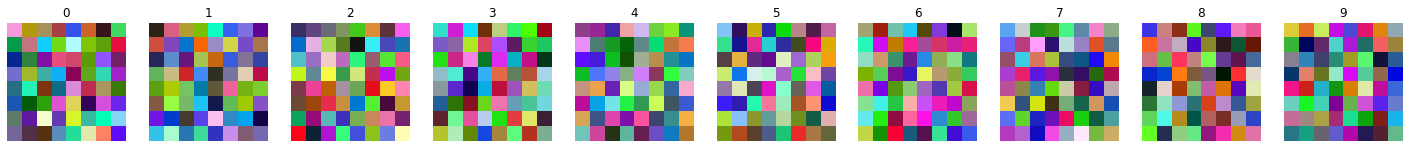

In [8]:
#let's wrap a set of pytorch images view them
I.wrap(pt_images).show(cols=10)

In [9]:
# let's convert these images to a set of pil images.
pil_images = I.wrap(pt_images).pil()
pil_images

[<PIL.Image.Image image mode=RGB size=8x8 at 0x7F5D45B55450>,
 <PIL.Image.Image image mode=RGB size=8x8 at 0x7F5D45B94550>,
 <PIL.Image.Image image mode=RGB size=8x8 at 0x7F5D45AF7B90>,
 <PIL.Image.Image image mode=RGB size=8x8 at 0x7F5D45AF7F50>,
 <PIL.Image.Image image mode=RGB size=8x8 at 0x7F5D460C1FD0>,
 <PIL.Image.Image image mode=RGB size=8x8 at 0x7F5D45B7DED0>,
 <PIL.Image.Image image mode=RGB size=8x8 at 0x7F5D45B7DDD0>,
 <PIL.Image.Image image mode=RGB size=8x8 at 0x7F5D45AFF050>,
 <PIL.Image.Image image mode=RGB size=8x8 at 0x7F5D45AFF8D0>,
 <PIL.Image.Image image mode=RGB size=8x8 at 0x7F5D45B7DC90>]

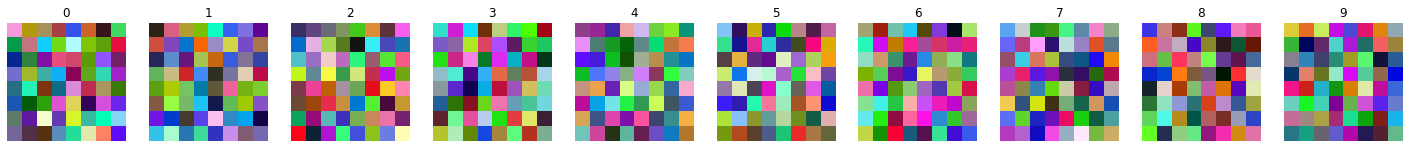

In [10]:
# Yes, we can wrap those PIL images and use them too.
I.wrap(pil_images).show(cols=10)

In [11]:
# Yes we can convert them back to pytorch tensors as well
I.wrap(pil_images).pt().shape

torch.Size([10, 3, 8, 8])

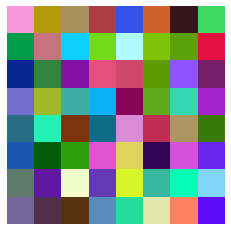

In [12]:
#BTW: you can wrap a single image as well
I.wrap(pil_images[0]).show()

## Image Resizing

Yes, resizing it a very common usecase & here how to do that.

In [13]:
# let's check the current size of our pil image
pil_images[0].size

(8, 8)

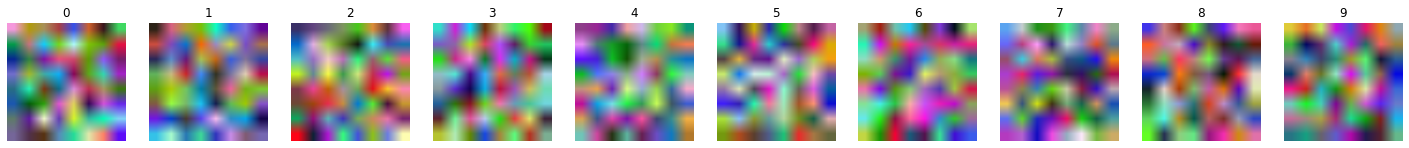

In [14]:
# they are tiny. let's increase their size
I.wrap(pil_images).resize(256, resample=2).show(cols=10)

**What's that?**

Here we use the PIL [image resize](https://pillow.readthedocs.io/en/stable/reference/Image.html#PIL.Image.Image.resize) method behind the scene. It uses bilinear sampling by default. Which is fine usually.

In this case, we need to keep this noisy box shape.

> That shape box is a single pixel in our pytorch images. It was a image of `8x8`.

 To do that, we can use the [nearest sampling](https://pillow.readthedocs.io/en/stable/reference/Image.html#PIL.Image.Resampling.NEAREST).

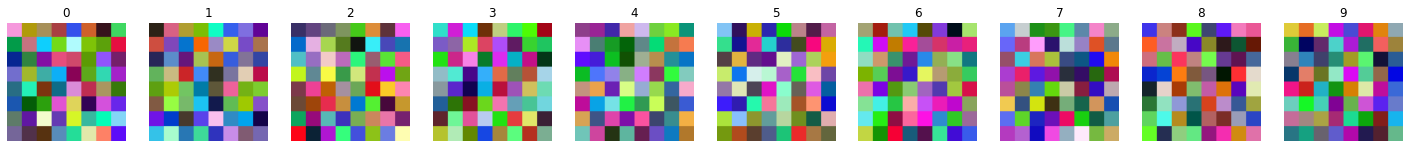

In [15]:
# using the nearest sampling
I.wrap(pil_images).resize(256, resample=0).show(cols=10)

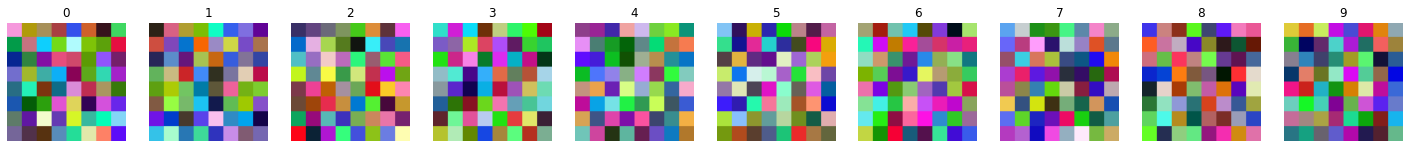

In [16]:
# we can use pytorch images as well
I.wrap(pt_images).resize(256, resample=0).show(cols=10)

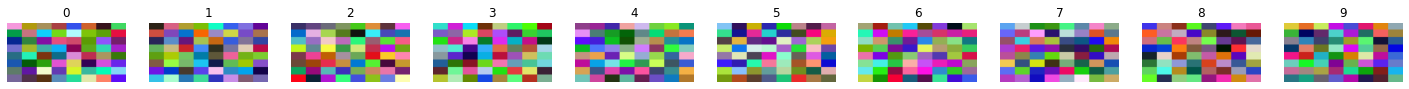

In [17]:
# We can give it a different width & height too
I.wrap(pt_images).resize((256, 128), resample=0).show(cols=10)

## Image Cropping

Let's download some images from the internet.

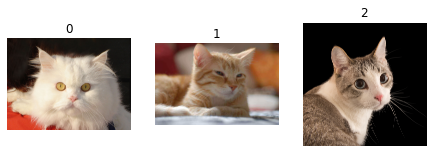

In [36]:
I.download(image_urls).show()

As you can see, they have different sizes and aspect ratios. That's where the `.crop()` function comes handy.

Actually it does both resize and croping. Let's give it a try.

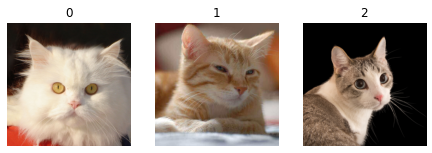

In [42]:
I.download(image_urls).crop(256).show()

By default, it does a middle crop. But we can change it like below:

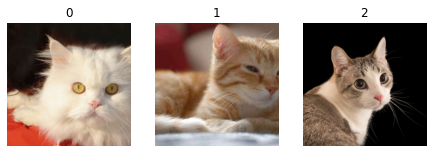

In [43]:
I.download(image_urls).crop(256, crop_type="top").show()

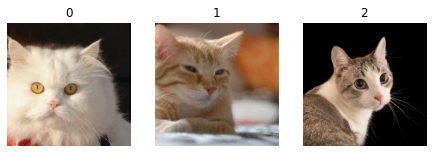

In [44]:
I.download(image_urls).crop(256, crop_type="bottom").show()

## Imutability & Checkpoints

All the changes you need inside a wrapper is immutable. So, you can make a reference at any point in your workflow & use them later.

In [18]:
a = I.wrap(pil_images[0]).resize(256)
b = I.wrap(pil_images[0]).resize((256, 100))

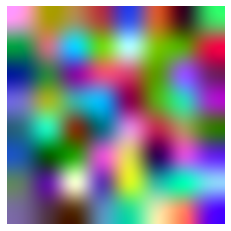

In [19]:
a.show()

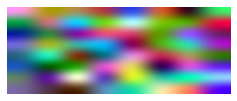

In [20]:
b.show()

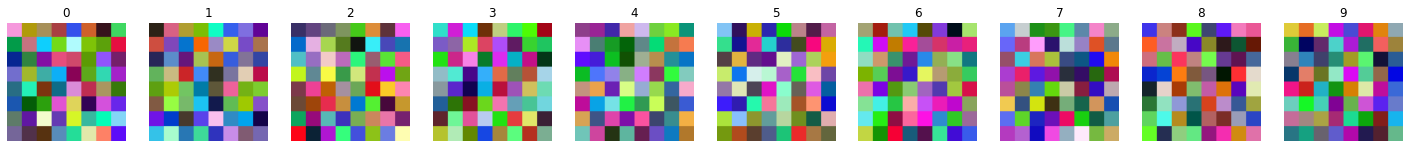

In [47]:
# Let's save a checkpoint after resize those pytorch images
images = I.wrap(pt_images).resize(256, resample=0)
images.show(cols=10)

After this point, we will use `images` wrapper checkpoint in the rest of the tutorial.

## Merging

Imitools comes with a very powerful merging tool where you can literally merge anything.

See:

In [48]:
images

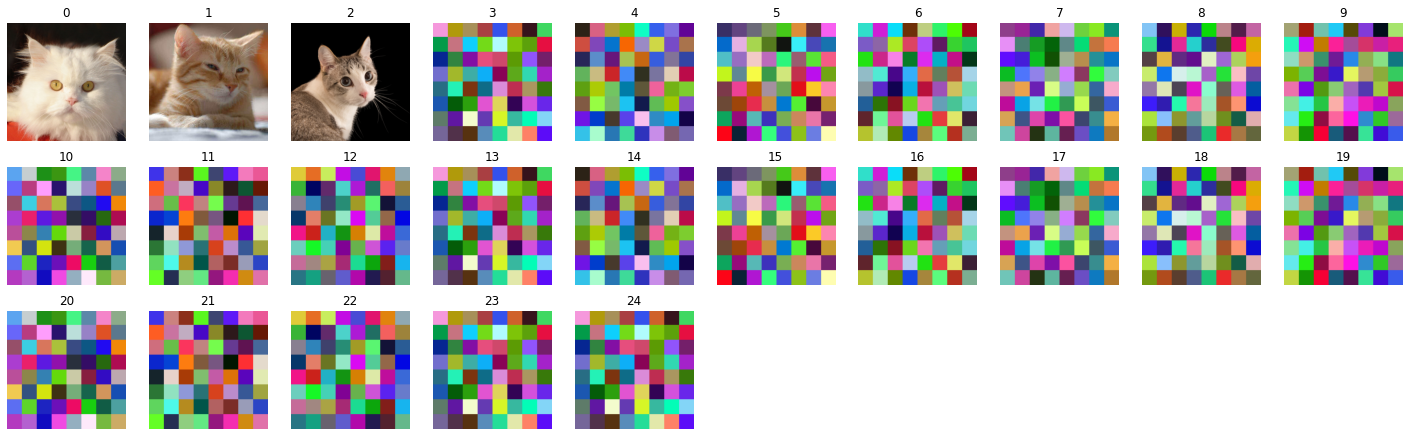

In [52]:
wrapper = I.download(image_urls)
pt_tensors = images.pt()
pil_arrays = images.pil()
pil_image = pil_arrays[0]
pt_image = pt_tensors[0]

I.merge(wrapper, pt_tensors, pil_arrays, pil_image, pt_image).crop(256).show(cols=10)

## Picking Images

Sometimes we need to pick some individual images from the wrapper, especially when downloading images from the internet.

Here's how to do that:

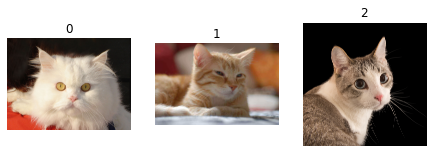

In [55]:
downloaded_images = I.download(image_urls)
downloaded_images.show()

In this case, I just want to pick the last image which is the index of `2`. Here's how to do that.

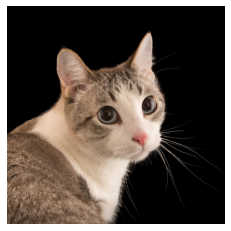

In [58]:
downloaded_images.pick(2).show()

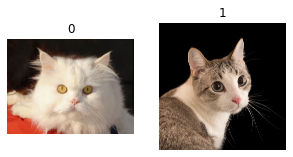

In [59]:
## Just like that, you can pick multiple images as well:
downloaded_images.pick(0, 2).show()

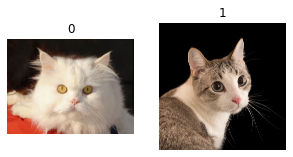

In [60]:
# or pass an array of indexes
downloaded_images.pick([0, 2]).show()

## Disk Access

As you expected, you can save images to the disk & load them from the space.

In [22]:
# let's save some images to the disk
images.to_dir("my_images")

As you can expected, they will be saved to a directory like this:

![](https://i.imgur.com/g1B1zsH.png)

In [23]:
# you can change the image prefix like this
images.to_dir("my_images2", prefix="my_image_")

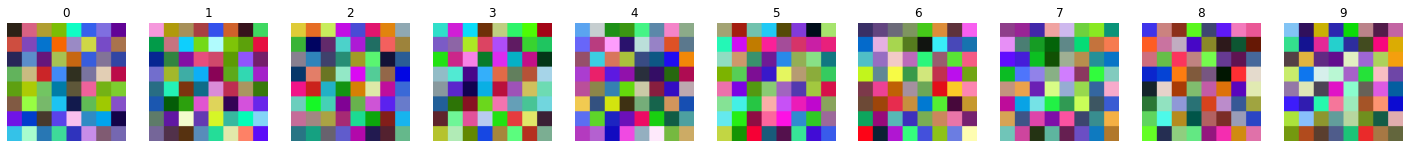

In [24]:
# As you expected, you can load images from the directory too.
I.from_dir("my_images").show(cols=10)

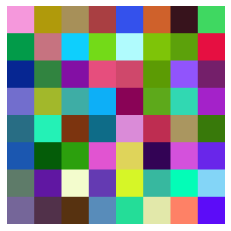

In [25]:
# you can even load a single image too.
I.from_path("my_images/image_0000.png").show()

## Default PyTorch Device

You can assign a default device for imitools. With that, you don't need to cast the resulting tensor to given device.

In [26]:
I.defaults.device = "cpu"

In [27]:
I.from_dir("./my_images/").pt().device

device(type='cpu')

## Creating a Video

If you use all the images in your imitools wrapper to create a video & show that. Here's how to do that.

**Make sure to add a GPU to your runtime**

In [28]:
# check for ffmpeg
!ffmpeg -version

ffmpeg version 3.4.11-0ubuntu0.1 Copyright (c) 2000-2022 the FFmpeg developers
built with gcc 7 (Ubuntu 7.5.0-3ubuntu1~18.04)
configuration: --prefix=/usr --extra-version=0ubuntu0.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --enable-gpl --disable-stripping --enable-avresample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librubberband --enable-librsvg --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvorbis --enable-libvpx --enable-libwavpack --enable-libwebp --enable-libx265 --enable-libxml2 --enable-libxvid --enable-libzmq

In [29]:
# #If you see an error for the above command, uncomment this & install ffmpeg
# !apt update -y > /dev/null 2>&1
# !DEBIAN_FRONTEND=noninteractive apt -y install ffmpeg > /dev/null 2>&1

In [30]:
images.to_video().show()

In [31]:
# You can also set the frame rate as you
images.to_video(frame_rate=1).show()

# Live Plots

Live Plots allow you to see what inside time consuming tasks while they are working.

Here are some examples:

* See the intermediate images when you are generating images with Stable Diffussion and other models
* Check the loss of the model in realtime

Let's see how to use it:

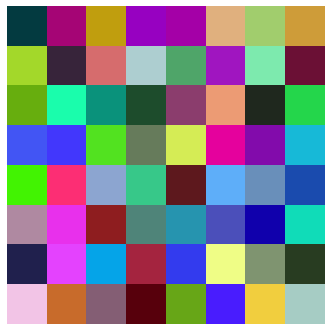

In [32]:
# Here we are going to see some intermediate images
lp = I.live_plot(cols=1)

## Let's assume we have 50 interations in the loop (so we will get 50 images)
gen_images = torch.rand(50, 3, 8, 8)

for i in range(50):
  
  ## check the every 5th generated event
  if i % 10 == 0:
    lp.imshow(0, gen_images[i])
    lp.update()

  ## add fake delay
  time.sleep(0.1)

lp.close()

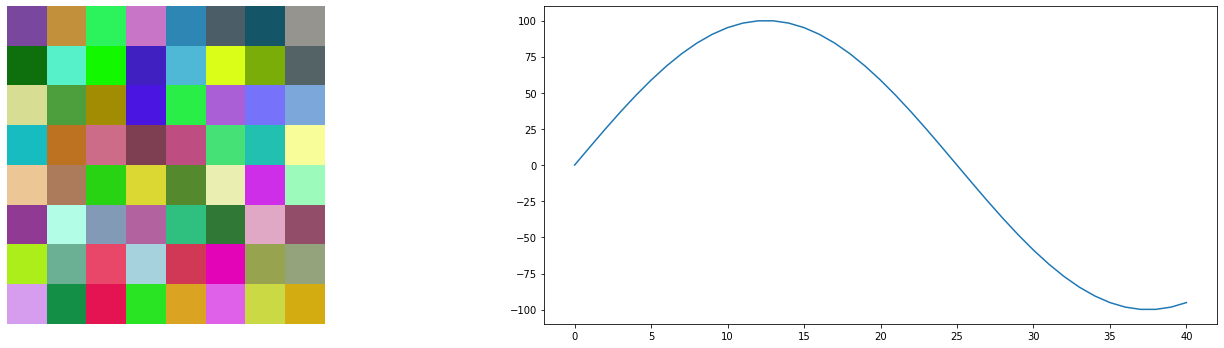

In [33]:
# Let's plot a graph as well along with the image. That's why we have the cols=2
lp = I.live_plot(cols=2)

## Let's assume we have 50 interations in the loop (so we will get 50 images)
gen_images = torch.rand(50, 3, 8, 8)
## this contains our losses
losses = []

for i in range(50):

  loss = math.sin(i/50 * math.pi * 2) * 100.0
  losses.append(loss)
  
  ## check the every 5th generated event
  if i % 10 == 0:
    # for imshow we can pass a single pytorch, pil image or a imitools wrapper
    lp.imshow(0, gen_images[i])
    lp.plot(1, losses)
    lp.update()

  ## add fake delay
  time.sleep(0.1)

lp.close()

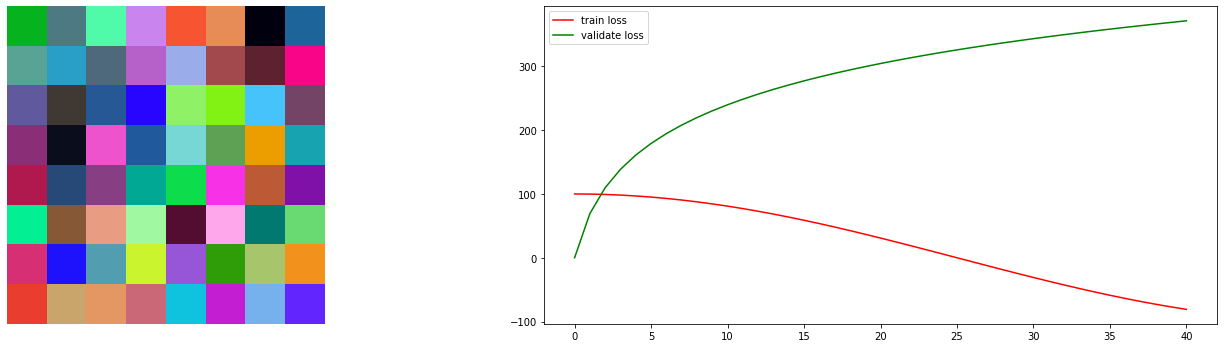

In [34]:
# You can plot multiple items in the graphs too
# Let's plot a graph as well along with the image. That's why we have the cols=2
lp = I.live_plot(cols=2)

## Let's assume we have 50 interations in the loop (so we will get 50 images)
gen_images = torch.rand(50, 3, 8, 8)
## this contains our losses
train_losses = []
validate_losses = []

for i in range(50):

  train_losses.append(math.cos(i/50 * math.pi) * 100.0)
  validate_losses.append(math.log(i+1) * 100.0)

  ## check the every 5th generated event
  if i % 10 == 0:
    # for imshow we can pass a single pytorch, pil image or a imitools wrapper
    lp.imshow(0, gen_images[i])
    lp.plot(1, train_losses, c="red", label="train loss")
    lp.plot(1, validate_losses, c="green", label="validate loss")
    lp.update()

  ## add fake delay
  time.sleep(0.1)

lp.close()

## Watch Imitools for More Updates

We are planning for more updates to imitools including:

* Download images from duckduckgo
* Draw images inside the notebook (useful for inpainting tools)

Keep watching for [GDi4K/imitools](https://github.com/GDi4K/imitools)